##### **Universidad Galileo**
##### **Postgrado en Análisis y Predicción de Datos** - *Cuarto Trimestre 2024*
##### **Product Development**
##### **Alumno:** Elder Cruz. **Carnet:** 23004456
##### **Alumno:** Walter Reyes. **Carnet:** 23004450
##### **Alumno:** Dayana Gamboa. **Carnet:** 23001913
##### **Alumno:** Rodrigo Cano. **Carnet:** 23001916
##### **Proyecto final:** Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset_path ='../data/raw/DataLoans_0424.csv'

In [3]:
DB_loans = pd.read_csv(dataset_path, delimiter = ";")
DB_loans.head()

,id,first_name,last_name,email,gender,Desembolso,Vencimiento,Tasa Original,Tasa Actual,Fecha Último Incremento,...,TIR,Cant.Pagarés,Suma_Asegurada,Flujo_Ingreso,Fujo_Costo,Com_Desembolso,Opex,PE,Rec_Capital,ISR
0,1,Celeste,Gallafant,cgallafant0@google.cn,Female,2/08/2022,30/04/2037,6.75,7.50,31/03/2024,...,0.006062,0,0.000,2.020633e+06,-1.694724e+06,0.0,0.0,97795.48672,3724668.653,-140440.66620
1,2,Alex,Skunes,askunes1@clickbank.net,Female,12/09/2022,28/02/2039,7.50,7.75,28/02/2023,...,0.008112,0,1511406.916,1.857647e+06,-1.509339e+06,0.0,0.0,98768.73707,2902574.199,-128877.29420
2,3,Kev,Enns,kenns2@ft.com,Male,23/10/2023,25/05/2026,7.25,7.50,31/03/2024,...,0.005582,0,0.000,3.088080e+05,-2.509065e+05,0.0,0.0,50038.62688,2573399.796,-21462.15430
3,4,Sioux,Di Meo,sdimeo3@xinhuanet.com,Female,17/07/2023,17/07/2028,8.25,8.50,31/03/2024,...,0.009979,0,0.000,4.828663e+05,-3.692507e+05,0.0,0.0,12103.22912,2272312.020,-33491.83332
4,5,Caron,Niave,cniave4@businessweek.com,Female,23/11/2023,25/05/2026,7.00,7.50,31/03/2024,...,0.005594,0,0.000,2.048941e+05,-1.664764e+05,0.0,0.0,33200.62893,1707450.764,-14188.18243


In [4]:
#exploración e información general del dataset
DB_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2819 non-null   int64  
 1   first_name                     2819 non-null   object 
 2   last_name                      2819 non-null   object 
 3   email                          2819 non-null   object 
 4   gender                         2819 non-null   object 
 5   Desembolso                     2819 non-null   object 
 6   Vencimiento                    2819 non-null   object 
 7   Tasa Original                  2819 non-null   float64
 8   Tasa Actual                    2819 non-null   float64
 9   Fecha Último Incremento        2819 non-null   object 
 10  Total bps Incrementados        2819 non-null   float64
 11  Número de Incrementos          2819 non-null   int64  
 12  Saldo de Capital               2819 non-null   f

In [5]:
#Estadísticas descriptivas iniciales del dataset
DB_loans.describe()

,id,Tasa Original,Tasa Actual,Total bps Incrementados,Número de Incrementos,Saldo de Capital,Saldo de Capital Quetzalizado,Primer Incremento,Segundo Incremento,Fecha2,...,TIR,Cant.Pagarés,Suma_Asegurada,Flujo_Ingreso,Fujo_Costo,Com_Desembolso,Opex,PE,Rec_Capital,ISR
count,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2.819000e+03,2.819000e+03,166.000000,48.000000,48.000000,...,2819.000000,2819.000000,2.819000e+03,2.819000e+03,2.819000e+03,2819.00000,2819.000000,2819.000000,2.819000e+03,2819.000000
mean,1410.000000,13.594753,13.640709,0.045956,0.079106,1.432183e+05,2.618781e+05,0.642470,0.403125,45348.958333,...,0.075969,0.015963,1.782775e+04,1.089336e+04,-8.243579e+03,20.61216,-41.573161,490.219778,3.369585e+04,-522.960124
std,813.919529,2.743443,2.668877,0.241097,0.346000,1.107875e+06,1.837030e+06,0.580611,0.210725,54.789329,...,0.049827,0.148665,3.845913e+05,8.033119e+04,6.353608e+04,539.39512,702.091739,4570.752379,2.363706e+05,5545.828463
min,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.100000,0.100000,45260.000000,...,-0.010037,0.000000,0.000000e+00,0.000000e+00,-1.694724e+06,0.00000,-23885.335590,0.000000,0.000000e+00,-140440.666200
25%,705.500000,13.000000,13.000000,0.000000,0.000000,6.812660e+03,6.912070e+03,0.250000,0.250000,45260.000000,...,0.051692,0.000000,0.000000e+00,1.526265e+02,-8.096561e+02,0.00000,0.000000,0.070648,8.893760e+02,68.750662
50%,1410.000000,13.000000,13.000000,0.000000,0.000000,1.599246e+04,1.663770e+04,0.500000,0.500000,45382.000000,...,0.071606,0.000000,0.000000e+00,4.822123e+02,-2.258647e+02,0.00000,0.000000,0.181135,2.140773e+03,131.351955
75%,2114.500000,16.000000,16.000000,0.000000,0.000000,3.782633e+04,4.002473e+04,0.500000,0.500000,45382.000000,...,0.092024,0.000000,0.000000e+00,1.772622e+03,-7.137988e+01,0.00000,0.000000,0.447271,5.149982e+03,165.494109
max,2819.000000,24.000000,24.000000,3.000000,3.000000,2.894745e+07,4.039761e+07,3.000000,1.000000,45382.000000,...,0.443723,3.000000,1.955034e+07,2.020633e+06,0.000000e+00,26886.00000,0.000000,98768.737070,5.197960e+06,450.348567


#### Analizando la descripción de algunas medidas estadísticas iniciales, se puede observar a nivel de promedio o media, que ha existido incremento de tasa, en promedio 4.6 puntos básicos, así también que la TIR promedio es de 7.60% de todo el dataset.  La tasa mínimima se mantiene en 5% y la máxima en 24% (descuentos de documento) así también, se observa que la TIR máxima es de 44.37% y la mínima de -1.00%.  El ISR promedio que generan los créditos es de 522 el minimo asciende a US140,440. en el tiempo de vida promedio de los créditos.  La Pérdida esperada promedio es de USD 490.22, la máxima asciende a $98,768.74

# 3. Análisis del dataset.  Evaluación del saldo de cartera por Segmento comercial

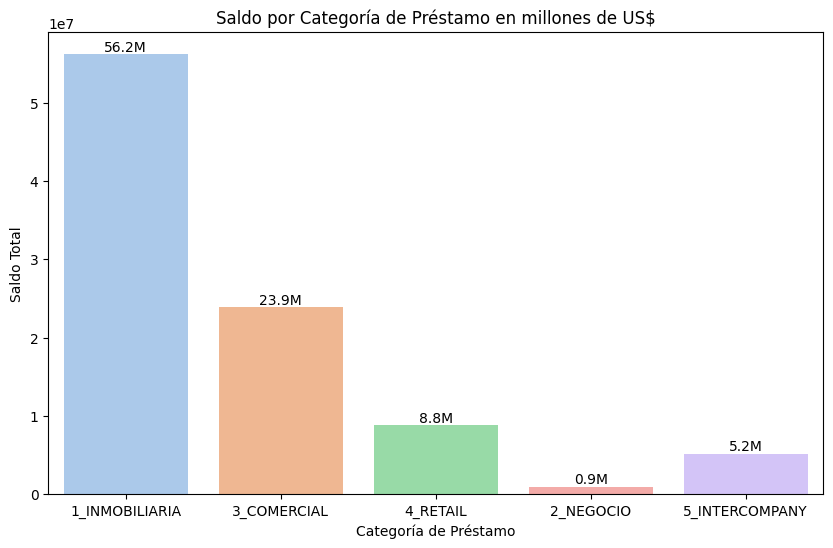

In [6]:
#Cambio nombre de segmento
replacements = {
  '1_BANCA INMOBILIARIA' : '1_INMOBILIARIA',
  '2_BANCA PRIVADA' : '2_NEGOCIO',
  '3_BANCA COMERCIAL' : '3_COMERCIAL',
  '4_ASOCIACIONES Y OTROS' : '4_RETAIL',
  '5_EMPRESAS CMI': '5_INTERCOMPANY'
}

DB_loans['SegmentoComercial'] = DB_loans['SegmentoComercial'].replace(replacements)

#Cartera de créditos posición de balance
plt.figure(figsize=(10,6))
ax = sns.barplot(data = DB_loans, x = 'SegmentoComercial', y= 'Saldo$', estimator = sum, hue = 'SegmentoComercial',dodge =False, errorbar=None,  palette = 'pastel', legend = False)

plt.title('Saldo por Categoría de Préstamo en millones de US$')
plt.xlabel('Categoría de Préstamo')
plt.ylabel('Saldo Total')


#Agregar etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height / 1000000:.1f}M', ha="center", va='bottom')


plt.show()

#### Se observa en la gráfica de arriba que 59% del saldo de los créditos se encuentra en el segmento inmobiliario, lo que indica que es el segmento comercial con mayor aporte en volumen a la entidad financiera

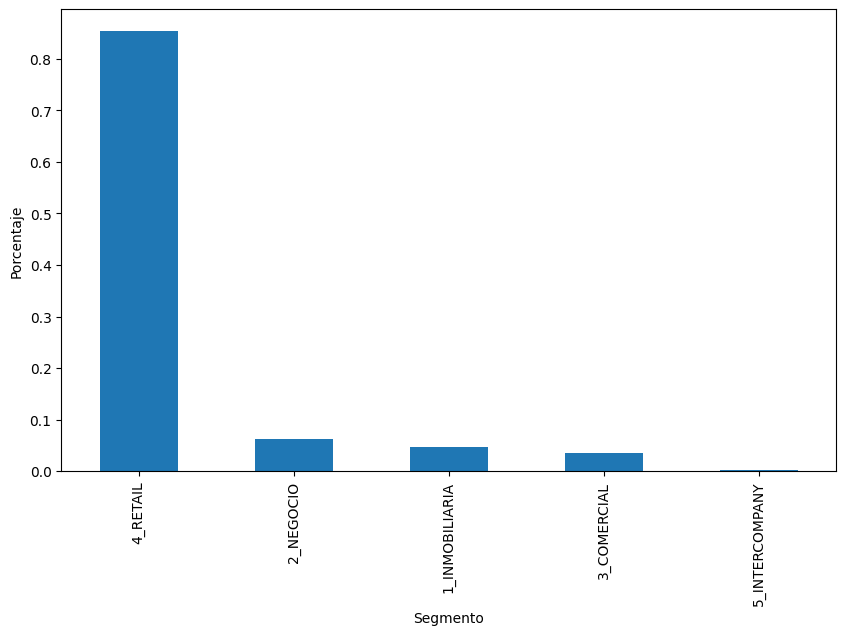

In [7]:
plt.figure(figsize = (10,6))
DB_loans['SegmentoComercial'].value_counts(normalize = True).sort_values(ascending = False).plot.bar()
plt.xlabel("Segmento")
plt.ylabel("Porcentaje")
plt.show()

# 4. Visualización de datos

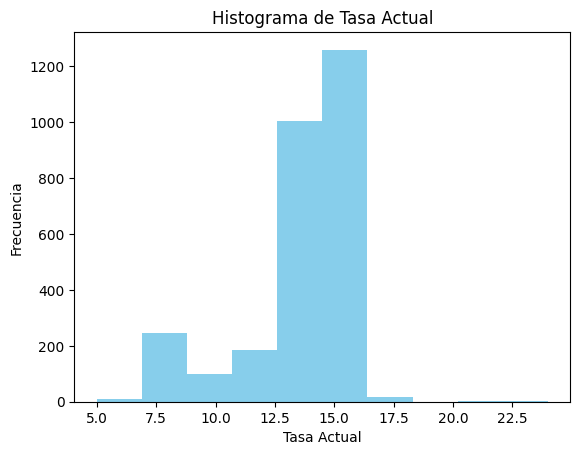

In [9]:
# Visualización de distribución de la variable Tasa actual
plt.hist(DB_loans['Tasa Actual'], color = "skyblue")
plt.xlabel('Tasa Actual')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Actual')

plt.show()

#### El histograma muestra las tasas que tienen frecuencia, en este sentido una tasa de 15 podría tener relación con los casos de retail, que si bien son muchos en frecuencia no aportan volumen a la cartera total y por tanto no son tan rentables dado que no generen el nivel de ingreso que inmobiliaria o el segmento comercial, que tendrá otro rango. Será necesario hacer el análisis eliminando el efecto de retail  

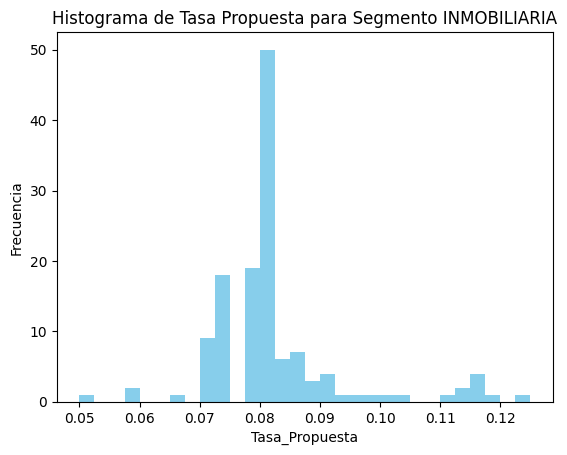

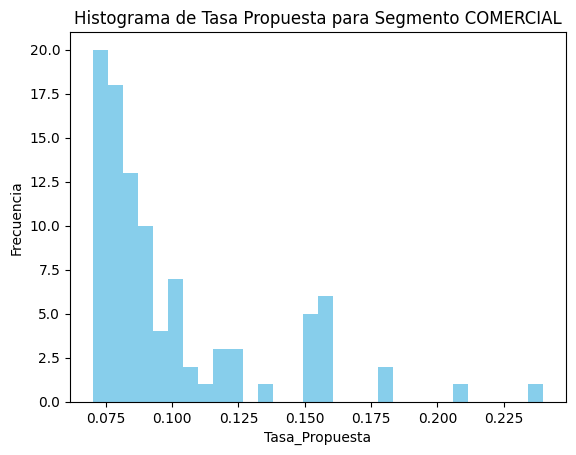

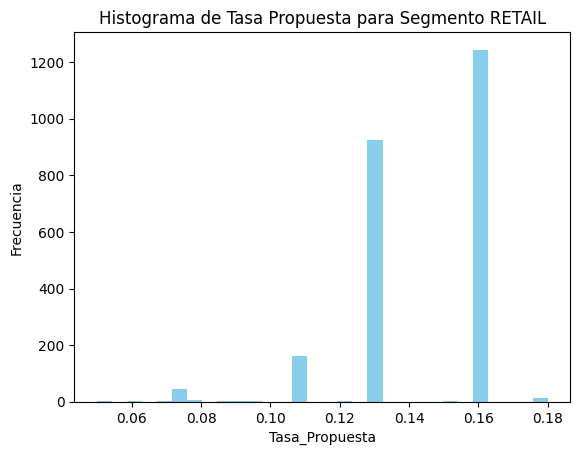

In [10]:
DB_loans_inmobiliaria = DB_loans[DB_loans['SegmentoComercial']== '1_INMOBILIARIA']
DB_loans_comercial = DB_loans[DB_loans['SegmentoComercial']== '3_COMERCIAL']
DB_loans_retail = DB_loans[DB_loans['SegmentoComercial']== '4_RETAIL']

plt.hist(DB_loans_inmobiliaria['Tasa_Propuesta'], color='skyblue', bins=30)
plt.xlabel('Tasa_Propuesta')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Propuesta para Segmento INMOBILIARIA')

plt.show()

plt.hist(DB_loans_comercial['Tasa_Propuesta'], color='skyblue', bins=30)
plt.xlabel('Tasa_Propuesta')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Propuesta para Segmento COMERCIAL')

plt.show()

plt.hist(DB_loans_retail['Tasa_Propuesta'], color='skyblue', bins=30)
plt.xlabel('Tasa_Propuesta')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Propuesta para Segmento RETAIL')

plt.show()

### Se aislan los casos y se observa que para el segmento inmobiliaria y comercial las tasas propuestas para incremento se encuentran entre los rangos de 7.5  a 8, dado que son los segmentos que aportan con mayor volumen a la cartera

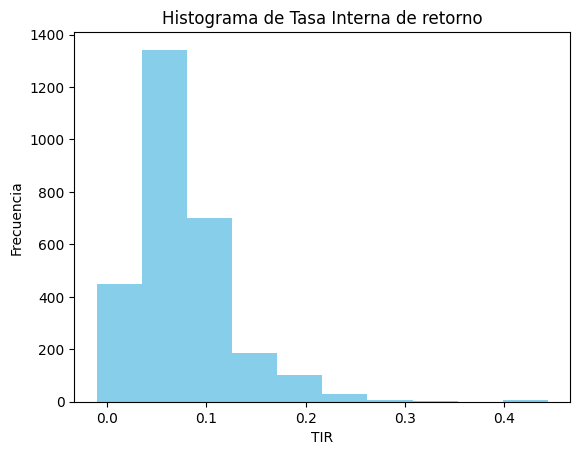

In [11]:
# Visualización de distribución de la variable TIR a nivel general de toda la cartera
plt.hist(DB_loans['TIR'], color = "skyblue")
plt.xlabel('TIR')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Interna de retorno')

plt.show()

#### El histograma de la tasa interna de retorno muestra un sesgo a la izquierda con mayor frecuencia aproximadamente en las TIR entre 7% y 8%, deberá revisarse por segmento, cuál es la agrupación que aporta este nivel de retorno a la entidad financiera

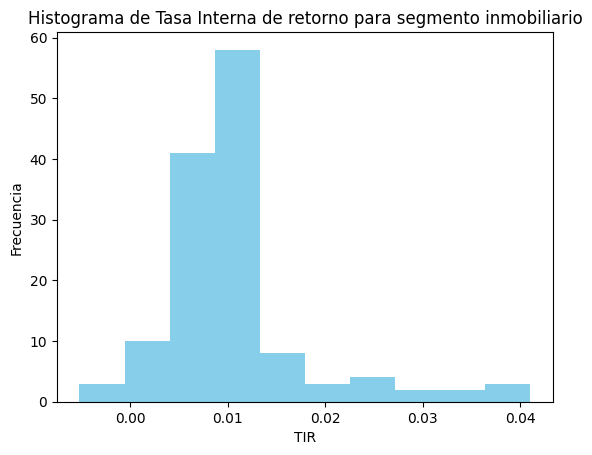

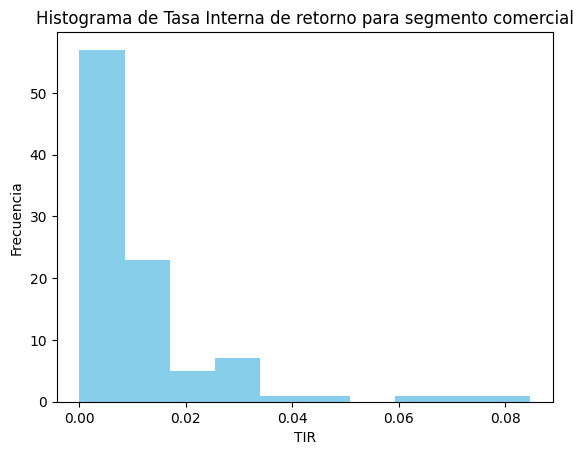

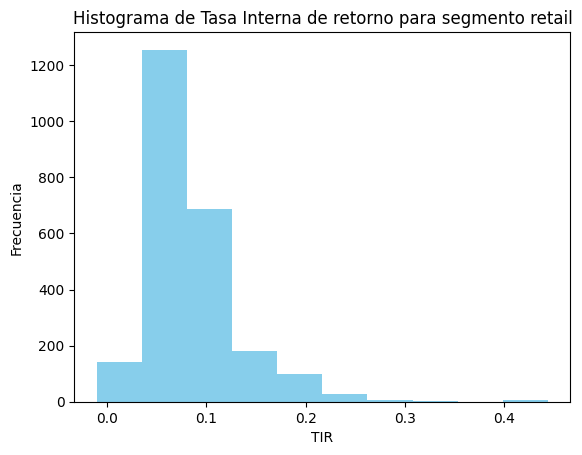

In [12]:
# Visualización de distribución de la variable TIR por los 3 primeros segmentos con mayor volumen en la cartera
plt.hist(DB_loans_inmobiliaria['TIR'], color = "skyblue")
plt.xlabel('TIR')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Interna de retorno para segmento inmobiliario')

plt.show()

plt.hist(DB_loans_comercial['TIR'], color = "skyblue")
plt.xlabel('TIR')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Interna de retorno para segmento comercial')

plt.show()

plt.hist(DB_loans_retail['TIR'], color = "skyblue")
plt.xlabel('TIR')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa Interna de retorno para segmento retail')

plt.show()

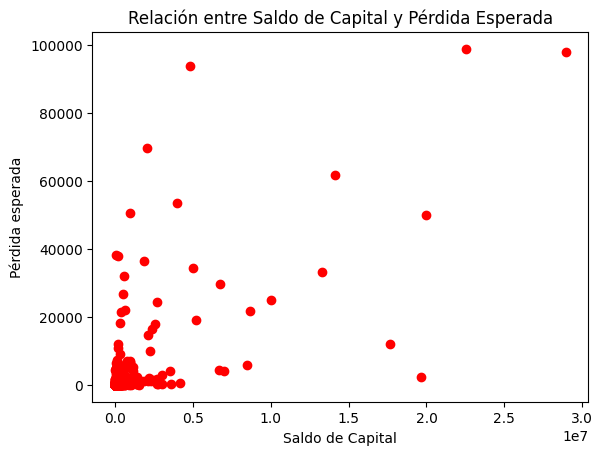

In [13]:
#Gráfico de dispersión entre dos variables (Saldo de capital vs Pérdida esperada total (Saldo$ * PD *LGD))
plt.scatter(DB_loans["Saldo de Capital"], DB_loans["PE"], color = "red")
plt.xlabel('Saldo de Capital')
plt.ylabel('Pérdida esperada')
plt.title('Relación entre Saldo de Capital y Pérdida Esperada')
plt.show()

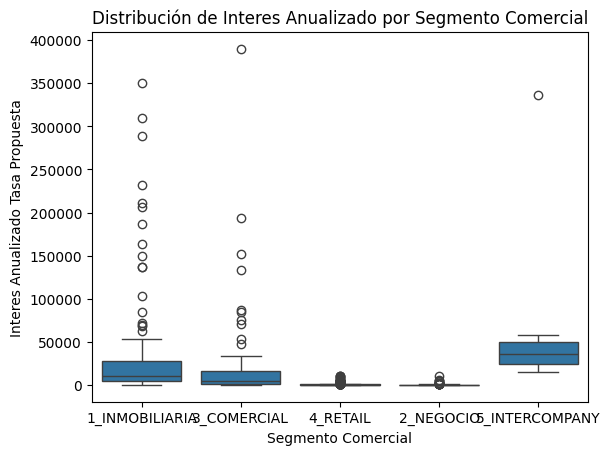

In [14]:
# Boxplot para comprar variables categóricas y númericas
sns.boxplot( x= "SegmentoComercial", y= "IntAnual_TasaPropuesta", data = DB_loans)
plt.xlabel('Segmento Comercial')
plt.ylabel('Interes Anualizado Tasa Propuesta')
plt.title('Distribución de Interes Anualizado por Segmento Comercial')
plt.show()

# 5. Análisis de correlación

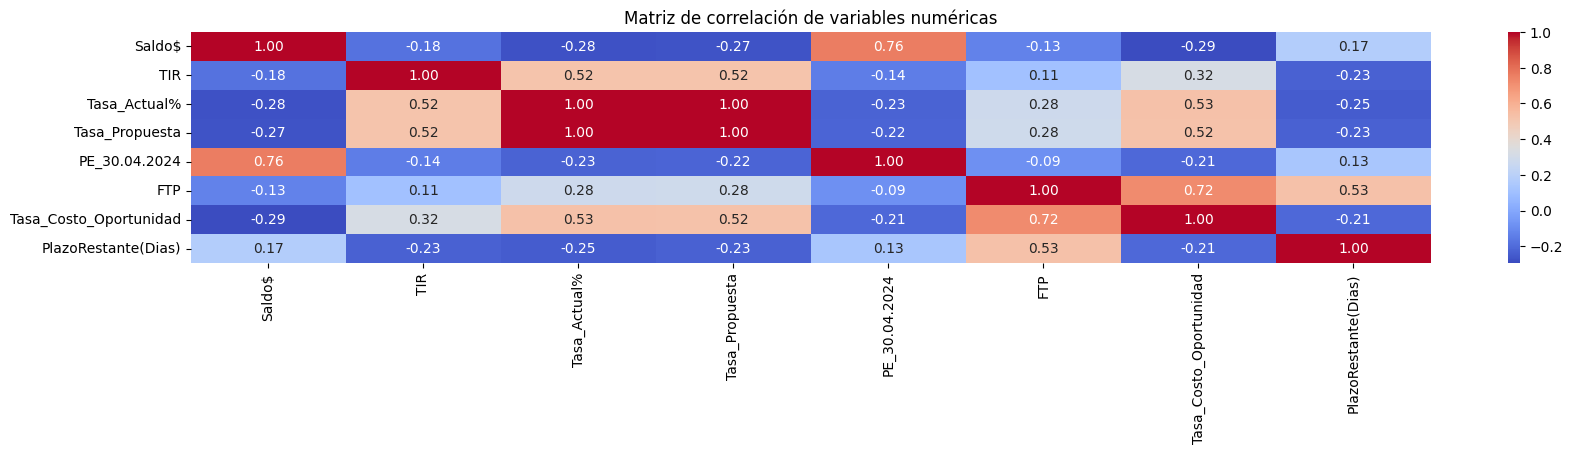

In [15]:
#Matriz de correlación entre las variables númericas

columnas_correlacion =['Saldo$','TIR','Tasa_Actual%','Tasa_Propuesta','PE_30.04.2024','FTP','Tasa_Costo_Oportunidad', 'PlazoRestante(Dias)']

correlation_matrix = DB_loans[columnas_correlacion].corr()

plt.figure(figsize=(20, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

#### En el análisis de correlación uasndo algunas variables del dataset se puede observar algunas variables con una correlación arribal del 50%, como por ejemplo las tasas actuales y las tasas propuestas vs la TIR, por otro lado también el Saldo$ vs la Pérdida esperada, también se observa una correlación positiva alta de la FTP vs la tasa de costo de oportunidad.  El Plazo restante tiene una correlación interesante con la FTP (tasa de transferencia de fondo) dado que esta tasa es construida por medio de la curva de rendimiento de la Bolsa de Valores Nacional

In [16]:
# Calcular el porcentaje de cada categoría en el total
porcentaje_categorias = DB_loans['SegmentoComercial'].value_counts(normalize=True) * 100
print(porcentaje_categorias)

SegmentoComercial
4_RETAIL          85.384888
2_NEGOCIO          6.136928
1_INMOBILIARIA     4.753459
3_COMERCIAL        3.440937
5_INTERCOMPANY     0.283789
Name: proportion, dtype: float64
